In [107]:
!pip install opencv-python

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [108]:
#OpenCV is a library for image processing

In [109]:
#now we are importing libraries to process the image.
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

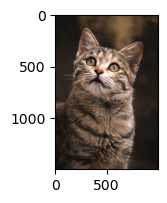

In [110]:
#now we are going to load our cat image
plt.figure(figsize=(4,2))
imagedata=plt.imread("../input/catimg/cat.jpg")
plt.imshow(imagedata)
plt.grid(False)
plt.show()

In [111]:
#shape show width,height and color channel rgb
imagedata.shape

(1500, 1000, 3)

In [112]:
print("image shape:{}".format(imagedata.shape))
print("image size is: image height:{}, image width:{} and image channle:{}={}".format(imagedata.shape[0],imagedata.shape[1],imagedata.shape[2], imagedata.size))

image shape:(1500, 1000, 3)
image size is: image height:1500, image width:1000 and image channle:3=4500000


In [113]:
#Now we are converting color because red green blue give us more information, rgb give us neal and clean configuration abut metadata
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

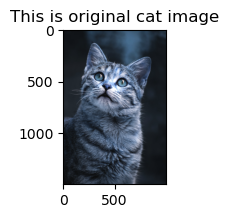

In [114]:
catimageShow('This is original cat image',imagedata)

In [115]:
imagedata.shape[:2]

(1500, 1000)

In [116]:
#now we are going to create mask, it is shadow information and can be changed, but deep information cant be change. so changing the shadow we need to use mask
#image recog, drawn image, lider info, data fusion , self driving car image, we need image mask
#we will also do image data feature extraction by zeros 
image_mask=np.zeros(imagedata.shape[:2], dtype="uint8")
image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [117]:
#rectangle mask
cv2.rectangle(image_mask,(0,545),(545,990),255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

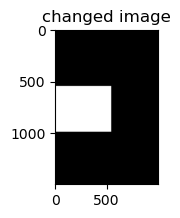

In [118]:
#our image changed on the mask image
#0 means black point, 1 means white
catimageShow("changed image", image_mask)

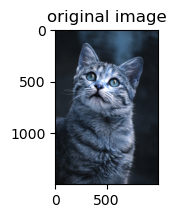

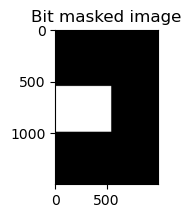

In [119]:
argumentImage = {"image":"../input/catimg/cat.jpg","scharr":0}
imagedata = plt.imread(argumentImage["image"])
catimageShow("original image", imagedata)
bit_mask=cv2.bitwise_and(imagedata,imagedata, mask=image_mask)
catimageShow("Bit masked image", image_mask)

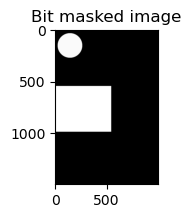

In [120]:

cv2.circle(image_mask,(145,150),120,250,-1)
bit_mask=cv2.bitwise_and(imagedata,imagedata, mask=image_mask)
catimageShow("Bit masked image", image_mask)


In [121]:
max(imagedata[0][0])

26

In [122]:
# Image Scalling
# Normalization
# Standarization
imagedata/255

array([[[0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        ...,
        [0.28235294, 0.21568627, 0.15294118],
        [0.28235294, 0.21568627, 0.15294118],
        [0.27843137, 0.21176471, 0.14901961]],

       [[0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        ...,
        [0.28235294, 0.21568627, 0.15294118],
        [0.28235294, 0.21568627, 0.15294118],
        [0.27843137, 0.21176471, 0.14901961]],

       [[0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        [0.10196078, 0.08235294, 0.07058824],
        ...,
        [0.27843137, 0.21568627, 0.15294118],
        [0.2745098 , 0.21176471, 0.14901961],
        [0.2745098 , 0.21176471, 0.14901961]],

       ...,

       [[0.07058824, 0.07058824, 0.07058824],
        [0.06666667, 0.06666667, 0.06666667],
        [0.05882353, 0

In [123]:
#magic value, new image will be 120 pixel height, this 
customvalueH=120.0/imagedata.shape[0]
customvalueW=700.0/imagedata.shape[1]

In [124]:
customvalueW

0.7

In [125]:
imagedata.shape[0]


1500

In [126]:
1500*0.7

1050.0

In [127]:
#now we will change image Dimention
imageDimention=(700, int(imagedata.shape[0]*customvalueW))

In [128]:
imagedata.shape


(1500, 1000, 3)

In [129]:
imageDimention

(700, 1050)

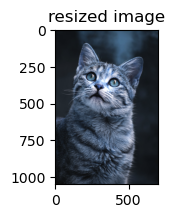

In [130]:
#INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. 
#But when the image is zoomed, it is similar to theINTER_NEAREST method.
#Interpolation is the way the extra pixels in the new image is calculated. If the original image is smaller, 
#then a larger rescaled image has extra pixels which is not exactly the same as a nearby pixels. The value of the extra pixel depends on the technique used.
newimage=cv2.resize(imagedata, imageDimention, interpolation=cv2.INTER_AREA)
catimageShow("resized image", newimage)

In [131]:
newimage.shape

(1050, 700, 3)

In [132]:
#image rotation


In [133]:
(imageH,imageW)=imagedata.shape[:2]

In [134]:
imageH

1500

In [135]:
imageW

1000

In [136]:
centerX,centerY=(imageH//2,imageW//2)

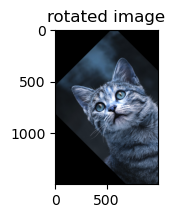

In [137]:
#warpAffine used for image rotation

imageRotate=cv2.getRotationMatrix2D((centerX,centerY),45,1.0)
rotateNow=cv2.warpAffine(imagedata, imageRotate,(imageW,imageH))
catimageShow("rotated image",rotateNow)

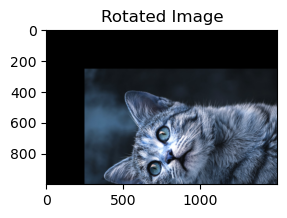

In [138]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 90, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, imageW))
catimageShow("Rotated Image", rotateNow)

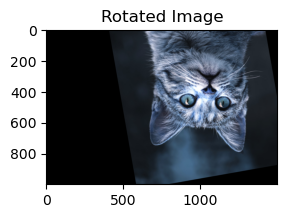

In [139]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 190, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, imageW))
catimageShow("Rotated Image", rotateNow)

In [140]:
#now we will work with edge image detection, we will collect gradient information and karnel informatin
#we also need to generate kernel
grayimage=cv2.cvtColor(imagedata,cv2.COLOR_RGB2GRAY)
grayimage.shape

(1500, 1000)

In [141]:
# scharr used for gray image deribative, if scharr greater then zeroo it will be -1,and other 1,2,3
#greater then deribative of x and less then deribative of y represent, all are gradient value
KernelGen= -1 if argumentImage["scharr"] >0 else 3

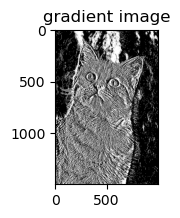

In [142]:
#
gradienImageDataX = cv2.Sobel(grayimage, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=KernelGen)
gradienImageDataY = cv2.Sobel(grayimage, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=KernelGen)
catimageShow("gradient image",gradienImageDataX )

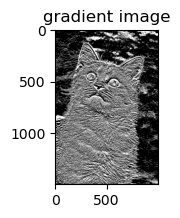

In [143]:
catimageShow("gradient image",gradienImageDataY )

In [144]:
#column first and end zeroo
gradienImageDataX

array([[  0.,   0.,   0., ...,  -4.,  -4.,   0.],
       [  0.,   0.,   0., ...,  -4.,  -4.,   0.],
       [  0.,   0.,   0., ...,  -4.,  -3.,   0.],
       ...,
       [  0., -12., -12., ...,   0.,  -4.,   0.],
       [  0., -12., -12., ...,   0.,  -4.,   0.],
       [  0., -12., -12., ...,   0.,  -4.,   0.]], dtype=float32)

In [145]:
#upper row and last row will show zeroo
gradienImageDataY

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2., -2., -2.],
       [ 0.,  0.,  0., ..., -4., -3., -2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)